In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')
df.head

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64>


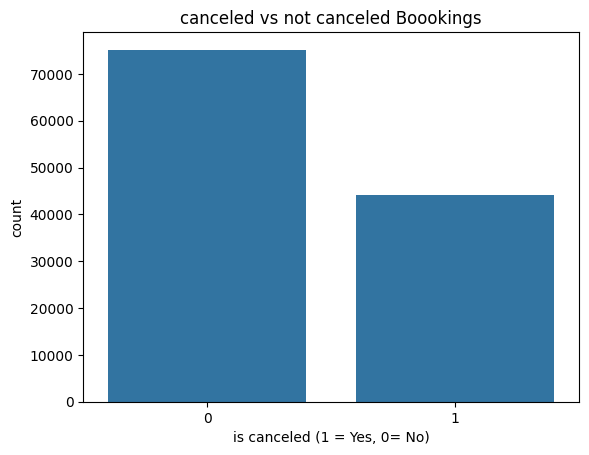

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cancel_counts = df['is_canceled'].value_counts
print(cancel_counts)

sns.countplot(x='is_canceled', data=df)
plt.title("canceled vs not canceled Boookings")
plt.xlabel("is canceled (1 = Yes, 0= No)")
plt.ylabel("count")
plt.show()

In [ ]:
cancellation_rate = df.groupby('hotel')['is_canceled'].mean()*100
print(cancellation_rate)

hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


/tmp/ipython-input-8-3736856520.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cancel = df.groupby('arrival_date_month')['is_canceled'].mean() * 100


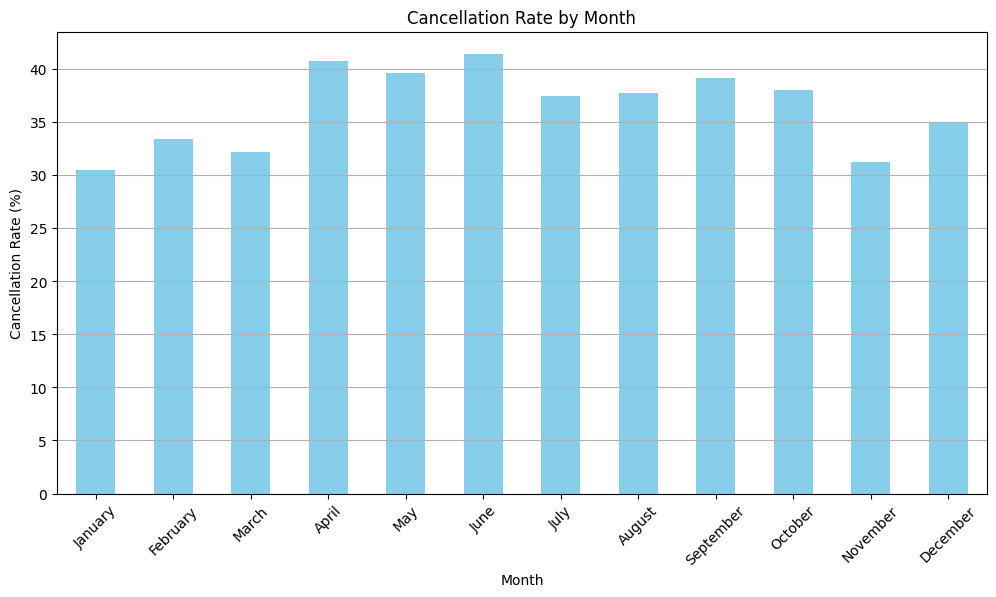

In [ ]:
import calendar

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],
                                          categories=list(calendar.month_name)[1:],  # Jan, Feb, ...
                                          ordered=True)

# حساب نسبة الإلغاء لكل شهر
monthly_cancel = df.groupby('arrival_date_month')['is_canceled'].mean() * 100

# رسم
monthly_cancel.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Cancellation Rate by Month')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

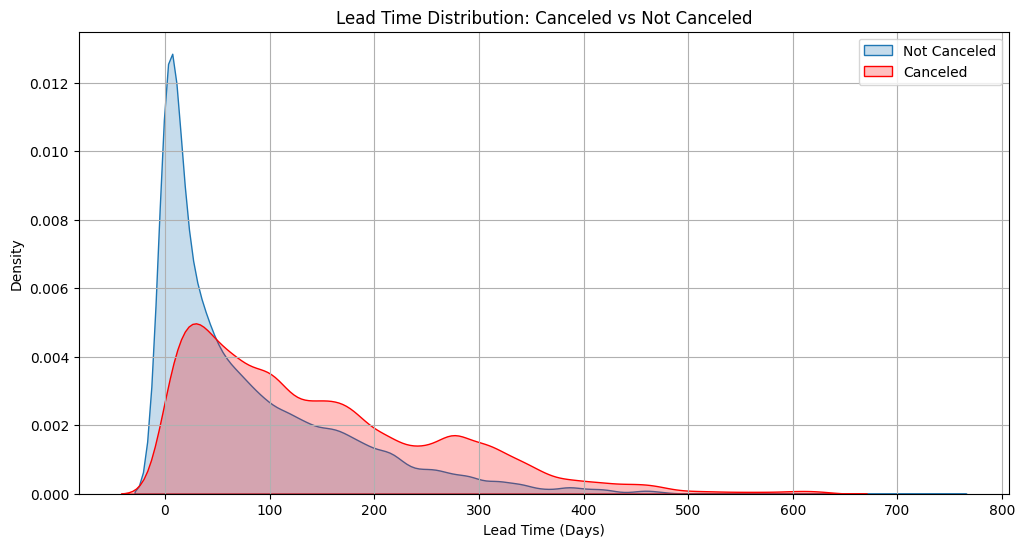

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df['is_canceled'] == 0], x='lead_time', label='Not Canceled', fill=True)
sns.kdeplot(data=df[df['is_canceled'] == 1], x='lead_time', label='Canceled', fill=True, color='red')
plt.title('Lead Time Distribution: Canceled vs Not Canceled')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['customer_type'].value_counts()

,count
customer_type,
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


In [ ]:
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean() * 100
print(cancel_by_customer)

customer_type
Contract           30.961727
Group              10.225303
Transient          40.746320
Transient-Party    25.429868
Name: is_canceled, dtype: float64


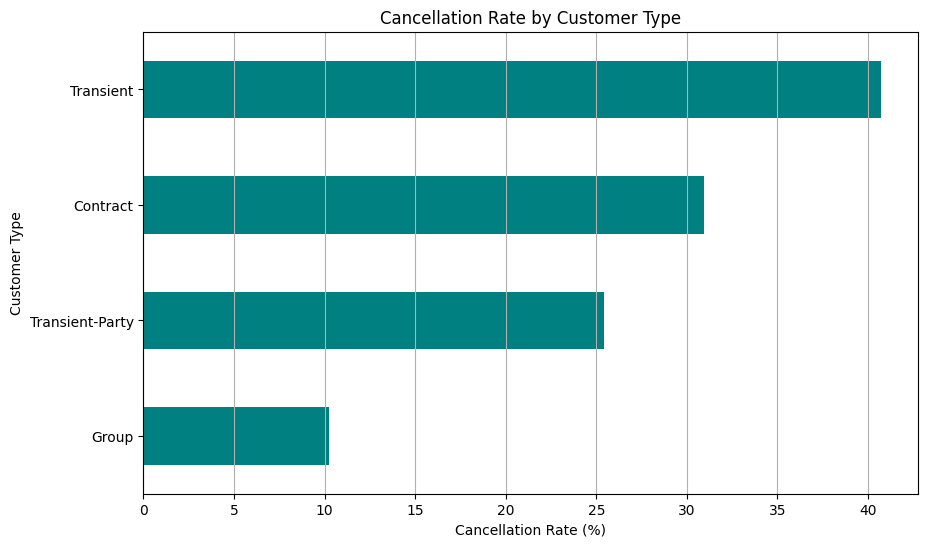

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cancel_by_customer.sort_values().plot(kind='barh', color='teal', figsize=(10,6))
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Customer Type')
plt.grid(axis='x')
plt.show()

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']


print(df[['adults', 'children', 'babies', 'total_guests']].head())

cancel_by_guests = df.groupby('total_guests')['is_canceled'].mean() * 100

print(cancel_by_guests)

   adults  children  babies  total_guests
0       2       0.0       0           2.0
1       2       0.0       0           2.0
2       1       0.0       0           1.0
3       1       0.0       0           1.0
4       2       0.0       0           2.0
total_guests
0.0      13.888889
1.0      29.028830
2.0      39.695057
3.0      32.170764
4.0      41.893612
5.0      24.817518
6.0     100.000000
10.0     50.000000
12.0     50.000000
20.0    100.000000
26.0    100.000000
27.0    100.000000
40.0    100.000000
50.0    100.000000
55.0    100.000000
Name: is_canceled, dtype: float64


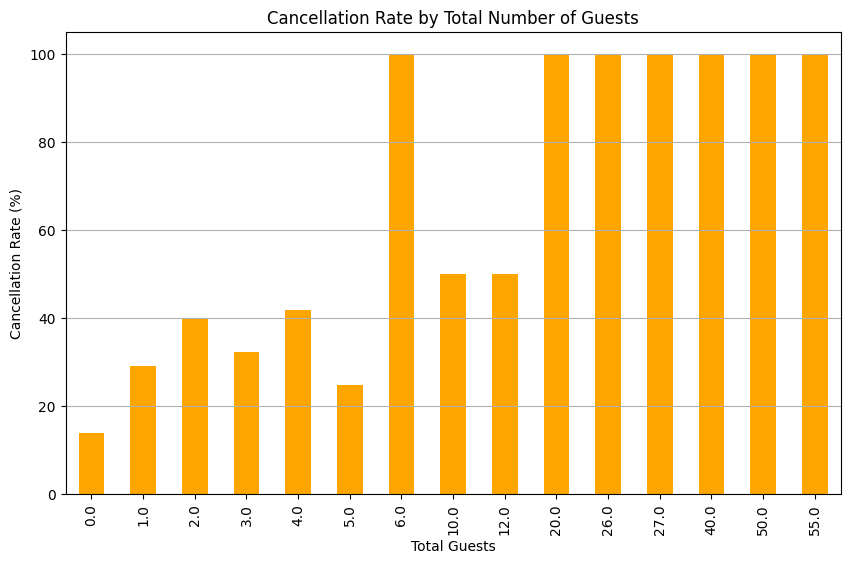

In [ ]:
import matplotlib.pyplot as plt

cancel_by_guests.plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Cancellation Rate by Total Number of Guests')
plt.xlabel('Total Guests')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y')
plt.show()

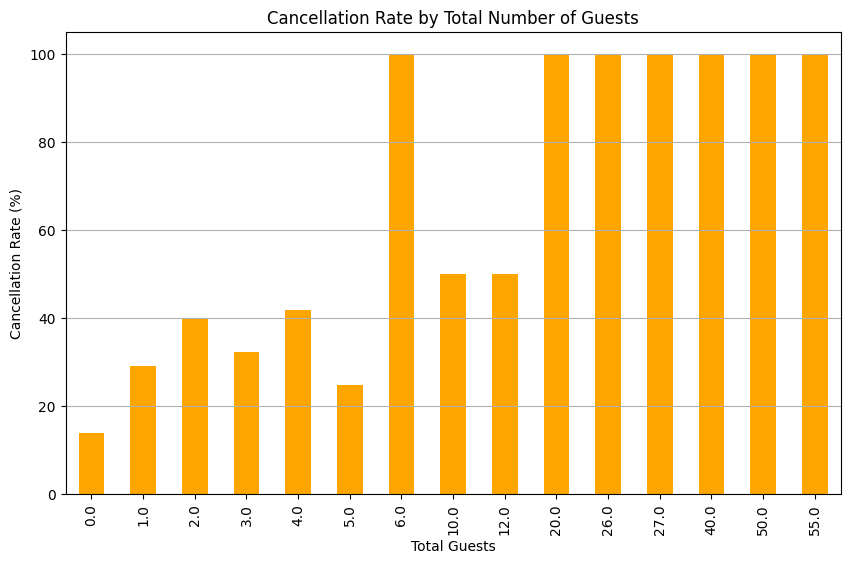

In [ ]:
import matplotlib.pyplot as plt

cancel_by_guests.plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Cancellation Rate by Total Number of Guests')
plt.xlabel('Total Guests')
plt.ylabel('Cancellation Rate (%)')
plt.grid(axis='y')
plt.show()